# 작업형 제 1유형 예시문제

In [1]:
import os

# os.chdir -> 데이터가 저장된 경로
os.chdir('../../../../data/03_dataq/dataq')

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.listdir()

['README.md', 'X_train.csv', 'mtcars.csv', '.git', 'y_train.csv', 'X_test.csv']

In [7]:
df = pd.read_csv('mtcars.csv',index_col=0)

```{admonition} Question 1
**mtcars 데이터셋(mtcars.csv)의 qsec 컬럼을 최소 최대 척도(min-max scale)로 변환한 후 0.5보다 큰 값을 가지는 레코드 수를 구하시오.**
```

In [46]:
X = df['qsec']
X_MinMax = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

overNum = len(X_MinMax[X_MinMax>0.5])

In [47]:
X_MinMax.values

array([0.23333333, 0.3       , 0.48928571, 0.58809524, 0.3       ,
       0.68095238, 0.15952381, 0.6547619 , 1.        , 0.45238095,
       0.52380952, 0.3452381 , 0.36904762, 0.41666667, 0.41428571,
       0.3952381 , 0.34761905, 0.59166667, 0.47857143, 0.64285714,
       0.65595238, 0.28214286, 0.33333333, 0.10833333, 0.30357143,
       0.52380952, 0.26190476, 0.28571429, 0.        , 0.11904762,
       0.01190476, 0.48809524])

In [49]:
overNum

9

```{admonition} Question 2
**mtcars 데이터셋(mtcars.csv)의 qsec 컬럼을 표준정규분포 데이터 표준화 (standardization) 변환 후 최대, 최소값을 각각 구하시오.**
```

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
sc = StandardScaler()

In [93]:
Max = max(sc.fit_transform(df.qsec.values.reshape(-1,1)))
Min = min(sc.fit_transform(df.qsec.values.reshape(-1,1)))

In [94]:
print(Max,Min)

[2.87198554] [-1.90399635]


```{admonition} Question 3
**mtcars 데이터셋(mtcars.csv)의 wt 컬럼의 이상치(IQR *1.5 외부에 존재하는)값들을 outlier 변수에 저장하라**
```

In [70]:
import numpy as np

In [74]:
q75,q50 ,q25 = np.percentile(df.wt, [75 ,50,25])
iqr = q75 - q25

In [76]:
outlier = df.wt[(df.wt>= q50 + iqr*1.5) | (df.wt <= q50 - iqr*1.5)].values

In [77]:
outlier

array([5.25 , 5.424, 5.345, 1.615, 1.513])

```{admonition} Question 4
**mtcars 데이터셋에서 mpg변수와 나머지 변수들의 상관계수를 구하여 다음과 같이 내림차순 정렬하여 표현하라**
```

In [104]:
corResult = df.corr()[['mpg']][1:].sort_values('mpg',ascending=False)

In [105]:
corResult

,mpg
drat,0.681172
vs,0.664039
am,0.599832
gear,0.480285
qsec,0.418684
carb,-0.550925
hp,-0.776168
disp,-0.847551
cyl,-0.852162
wt,-0.867659


```{admonition} Question 5
**mtcars 데이터셋에서 mpg변수를 제외하고 데이터 정규화 (standardscaler) 과정을 진행한 이후 PCA를 통해 변수 축소를 하려한다. 누적설명 분산량이 92%를 넘기기 위해서는 몇개의 주성분을 선택해야하는지 설명하라**
```

In [110]:
pcaDf = df.iloc[:,1:]
pcaDf = sc.fit_transform(pcaDf)

In [113]:
from sklearn.decomposition import PCA

componentsNum=10
pca = PCA(n_components=componentsNum) 
printcipalComponents = pca.fit_transform(pcaDf)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['component'+str(x) for x in range(componentsNum)])

In [127]:
componentDf = pd.DataFrame(pca.explained_variance_ratio_,columns=['cumsumVariance']).cumsum().reset_index()
componentDf['index'] +=1
componentDf=componentDf.rename(columns={'index':'componentsCount'})

In [128]:
componentDf

,componentsCount,cumsumVariance
0,1,0.576022
1,2,0.840986
2,3,0.900708
3,4,0.927658
4,5,0.949883
5,6,0.970895
6,7,0.984187
7,8,0.992255
8,9,0.997620
9,10,1.000000


```{admonition} Question 6
**mtcars 의 index는 (업체명) - (모델명)으로 구성된다. (valiant는 업체명) mtcars에 'brand' 컬럼을 추가하고 value 값으로 업체명을 입력하라**
```

In [143]:
df['brand'] = pd.DataFrame(list(df.index.str.split(" ")))[0].values

In [160]:
df.head(5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet


```{admonition} Question 7
**추가된 brand 컬럼을 제외한 모든 컬럼을 통해 pca를 실시한다. 2개의 주성분과 brand컬럼으로 구성된 새로운 데이터 프레임을 출력하고, brand에 따른 2개 주성분을 시각화하여라 (brand를 구분 할수 있도록 색이다른 scatterplot, legend를 표시한다)**
```

In [147]:
from sklearn.decomposition import PCA

pcaDf = df.drop('brand',axis=1)

componentsNum=2
pca = PCA(n_components=componentsNum) 
printcipalComponents = pca.fit_transform(pcaDf)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['component'+str(x) for x in range(componentsNum)])

In [152]:
principalDf['brand'] = df['brand'].values

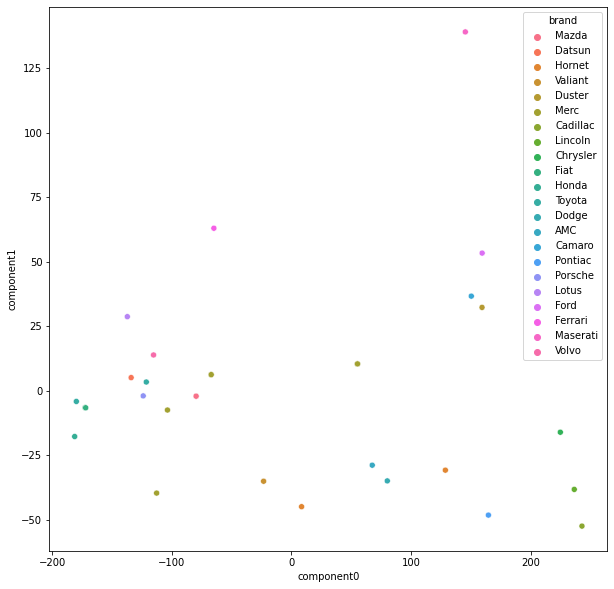

In [158]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(x='component0',y='component1',hue='brand',data=principalDf)
plt.show()